# 主成分分析 PCA



## 演習内容

2個のデータに対して、
1. データ読込み⇒標準化⇒PCA
2. PCAの結果表の作成(全主成分)
3. 第1, 第2主成分の散布図
4. 第1主成分と第2主成分について解釈する
各変数(教科や項目)の説明は、datasheet.pdfを参照

- 中学生の成績データ(統計科学研究所:statistics.co.jp)
  - `seiseki.csv`: 166人、9教科

- 2022年度プロ野球個人打撃成績(日本野球機構:npb.jp)
  - `baseball.csv`: 49人、24項目

機械学習ライブラリ`scikit-learn`を使用して演習を行った。

## CSVファイルの読込み

In [ ]:
%pip install ptitprince

In [1]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])

['STIXGeneral', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Sans', 'STIXNonUnicode', 'STIXSizeThreeSym', 'cmss10', 'STIXNonUnicode', 'STIXGeneral', 'DejaVu Serif', 'STIXSizeThreeSym', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXSizeTwoSym', 'DejaVu Sans Mono', 'cmtt10', 'DejaVu Serif Display', 'STIXNonUnicode', 'STIXSizeFourSym', 'cmmi10', 'cmsy10', 'DejaVu Sans Mono', 'cmr10', 'DejaVu Sans', 'STIXSizeOneSym', 'STIXGeneral', 'DejaVu Serif', 'STIXGeneral', 'DejaVu Serif', 'STIXSizeTwoSym', 'STIXNonUnicode', 'cmb10', 'cmex10', 'STIXSizeFiveSym', 'STIXSizeOneSym', 'DejaVu Serif', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans Mono', 'DejaVu Serif']


In [2]:

import matplotlib.pyplot as plt

import pandas as pd

# データファイルのパス
grade_file_path = 'data/seiseki.csv'
baseball_file_path = 'data/baseball.csv'

# CSVファイルの読み込み
grade_data = pd.read_csv(grade_file_path)
baseball_data = pd.read_csv(baseball_file_path)


In [3]:
# データの先頭部分を表示して内容を確認
grade_data.head()

,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
0,30,43,51,63,60,66,37,44,20
1,39,21,49,56,70,72,56,63,16
2,29,30,23,57,69,76,33,54,6
3,95,87,77,100,77,82,78,96,87
4,70,71,78,67,72,82,46,63,44


In [4]:
# データの先頭部分を表示して内容を確認
baseball_data.head()

,選手,チーム,打率,試合,打席,打数,得点,安打,二塁打,三塁打,...,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打,長打率,出塁率
0,オスナ,(ヤ),0.253,134,543,501,49,127,23,0,...,4,0,2,39,5,1,79,13,0.437,0.308
1,サンタナ,(ヤ),0.300,136,516,467,52,140,32,0,...,0,0,3,44,1,2,114,17,0.484,0.360
2,ノイジー,(神),0.240,133,516,475,42,114,13,1,...,0,0,3,36,0,2,85,13,0.328,0.295
3,ポランコ,(ロ),0.242,125,497,447,43,108,15,0,...,0,0,3,47,5,0,92,3,0.450,0.312
4,マキノン,(西),0.259,127,514,464,50,120,17,2,...,1,0,2,48,0,0,91,7,0.401,0.327


## 成績データの分析

### 標準化と主成分分析の実行

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データの標準化
grade_scaler = StandardScaler()
standardized_grade_data = grade_scaler.fit_transform(grade_data)


# PCAの実行
pca = PCA()
grade_pca = pca.fit_transform(standardized_grade_data)

# 各主成分の寄与率と累積寄与率を確認
grade_explained_variance = pca.explained_variance_ratio_
grade_cumulative_explained_variance = grade_explained_variance.cumsum()

# 寄与率と累積寄与率の結果をDataFrameで表示
grade_pca_results = pd.DataFrame({
    '主成分': range(1, len(grade_explained_variance) + 1),
    '寄与率': grade_explained_variance,
    '累積寄与率': grade_cumulative_explained_variance
})

grade_pca_results


,主成分,寄与率,累積寄与率
0,1,0.667381,0.667381
1,2,0.122021,0.789402
2,3,0.054538,0.843940
3,4,0.045220,0.889159
4,5,0.033362,0.922522
5,6,0.024607,0.947128
6,7,0.020310,0.967438
7,8,0.019022,0.986460
8,9,0.013540,1.000000


第一主成分と第二主成分までで、累積寄与率が約78.9%となり、この2つの主成分で元のデータがおおよそ説明できることがわかった。

### 第一主成分と第二主成分の散布図

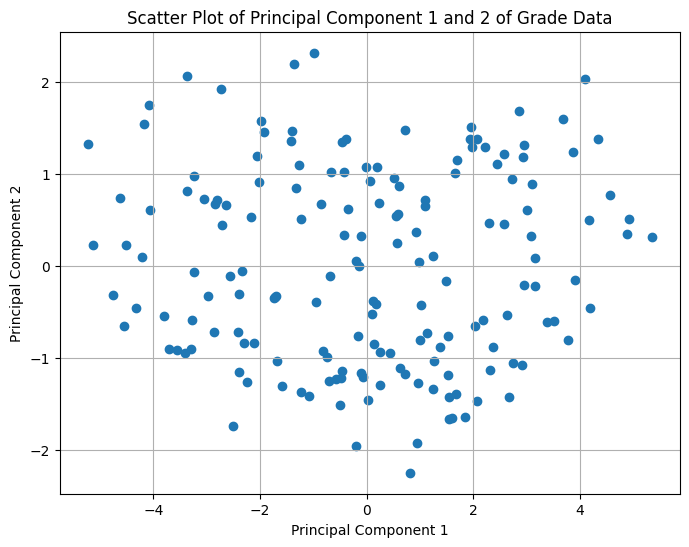

In [6]:
# 第1主成分と第2主成分の散布図の作成
plt.figure(figsize=(8, 6))
plt.scatter(grade_pca[:, 0], grade_pca[:, 1])
plt.title('Scatter Plot of Principal Component 1 and 2 of Grade Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

###　因子負荷量

In [7]:
# 各主成分の負荷量（成分の係数）を取得
loadings = pca.components_

# 第1主成分と第2主成分の負荷量をDataFrameで表示
index = ['PC{}'.format(x + 1) for x in range(len(loadings))]
loadings_df = pd.DataFrame(loadings, columns=grade_data.columns, index=index)
loadings_df


,kokugo,shakai,sugaku,rika,ongaku,bijutu,taiiku,gika,eigo
PC1,-0.362639,-0.368570,-0.356895,-0.367226,-0.354309,-0.312678,-0.139248,-0.316726,-0.356949
PC2,-0.149422,0.147029,0.181437,0.250686,-0.009508,-0.312168,-0.859298,0.148958,0.046610
PC3,0.073623,-0.061551,-0.399680,0.008251,-0.199606,0.263783,-0.080264,0.783869,-0.317273
PC4,-0.236443,-0.106524,0.029476,0.066644,0.356880,0.712269,-0.284248,-0.293357,-0.354812
PC5,-0.301468,-0.086651,-0.061124,0.262381,0.642392,-0.440125,0.268566,0.189814,-0.338372
PC6,-0.494063,-0.572745,0.408150,0.038858,-0.131948,0.136309,0.106634,0.286649,0.360888
PC7,0.619991,-0.516987,0.408898,-0.176506,0.119437,-0.124784,-0.127556,0.041500,-0.319615
PC8,-0.109703,0.234943,0.446183,0.392465,-0.495133,-0.001600,0.234850,-0.061830,-0.524902
PC9,0.231160,-0.411562,-0.377484,0.736380,-0.132927,0.003495,-0.007348,-0.230749,0.146459


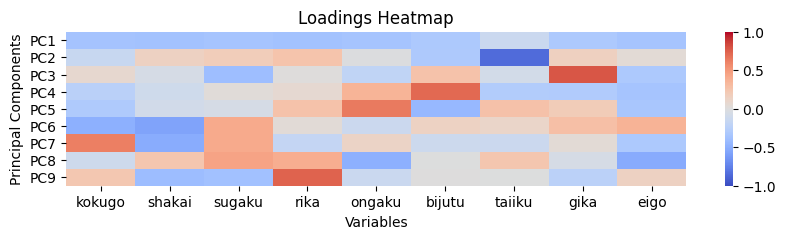

In [8]:
import seaborn as sns

# 各主成分の負荷量（成分の係数）を取得
loadings = pca.components_

# 第1主成分と第2主成分の負荷量をDataFrameで表示
loadings_df = pd.DataFrame(loadings, columns=grade_data.columns, index=index)

# ヒートマップの作成
plt.figure(figsize=(10, 2))
sns.heatmap(loadings_df, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Loadings Heatmap')
plt.xlabel('Variables')
plt.ylabel('Principal Components')
plt.show()


第1主成分と第2主成分の負荷量を見ると、以下のような傾向が見られた。

#### 第1主成分
ほとんどの教科（国語、社会、数学、理科、音楽、美術、技家、英語）の負荷量が負で、値が比較的大きい。これは、これらの教科の成績が高いほど、第1主成分の値が低くなることを意味する。すなわち、第1主成分はこれらの教科の成績の全体的な水準を表していると解釈できる。
ただし、体育の負荷量は他の教科に比べて低い。これは、体育の成績が第1主成分にはそれほど影響を与えていないことを示している。

#### 第2主成分
体育と美術が絶対値が大きい負の値を示している。特に、体育の絶対値は極めて大きい。これは、体育と美術の成績が高いほど、第2主成分の値が低くなることを意味する。
また、その他の教科は、概ね正の値を示している。これは、その他の教科の成績が高いほど、第2主成分の値が高くなることを意味する。
つまり、第2主成分が低いほど、体育と美術の成績が高く、その他の教科の成績が低いことを意味する。

#### 結論
この結果から、第1主成分は学業成績の水準を、第2主成分は体育の成績とその他の教科との関連性を表していると解釈できる。
第1主成分が低い生徒は全体的に成績が良好であり、第2主成分が低い生徒は、体育や美術の能力に特化していると言える。

## 野球データの分析

### 標準化と主成分分析の実行

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# データの標準化
scaler = StandardScaler()
# 数値データのみを標準化するため、非数値の列を除外
baseball_numeric_columns = baseball_data.select_dtypes(include=[float, int]).columns
standardized_baseball_data = scaler.fit_transform(baseball_data[baseball_numeric_columns])

# PCAの実行
pca = PCA()
baseball_pca = pca.fit_transform(standardized_baseball_data)

# 各主成分の寄与率と累積寄与率を確認
baseball_explained_variance = pca.explained_variance_ratio_
baseball_cumulative_explained_variance = baseball_explained_variance.cumsum()

# 寄与率と累積寄与率の結果をDataFrameで表示
baseball_pca_results = pd.DataFrame({
    '主成分': range(1, len(baseball_explained_variance) + 1),
    '寄与率': baseball_explained_variance,
    '累積寄与率': baseball_cumulative_explained_variance
})

baseball_pca_results


,主成分,寄与率,累積寄与率
0,1,3.587890e-01,0.358789
1,2,1.916899e-01,0.550479
2,3,9.028069e-02,0.640760
3,4,6.632327e-02,0.707083
4,5,5.808039e-02,0.765163
5,6,5.440496e-02,0.819568
6,7,3.138346e-02,0.850952
7,8,3.040977e-02,0.881361
8,9,2.620606e-02,0.907567
9,10,2.278791e-02,0.930355


### 第一主成分と第二主成分の散布図

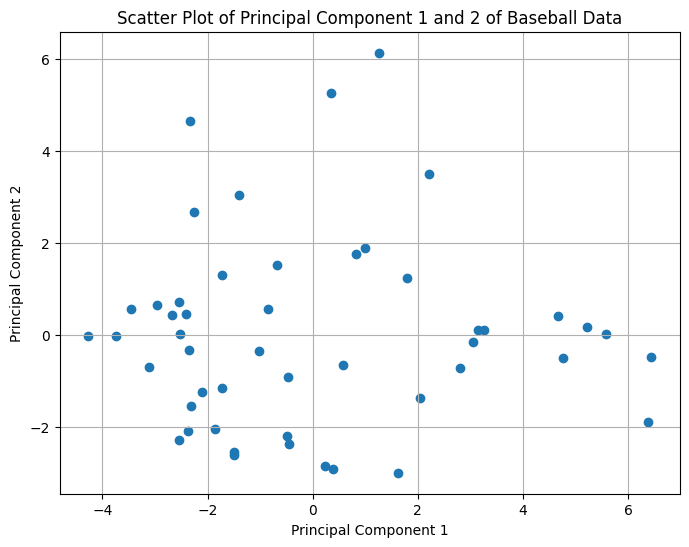

In [10]:
import matplotlib.pyplot as plt

# 第1主成分と第2主成分の散布図の作成
plt.figure(figsize=(8, 6))
plt.scatter(baseball_pca[:, 0], baseball_pca[:, 1])
plt.title('Scatter Plot of Principal Component 1 and 2 of Baseball Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


### 因子負荷量

In [11]:
# 各主成分の負荷量（成分の係数）を取得
loadings = pca.components_

# 第1主成分と第2主成分の負荷量をDataFrameで表示
index = ['PC{}'.format(x + 1) for x in range(len(loadings))]
loadings_df = pd.DataFrame(loadings, columns=baseball_numeric_columns, index=index)
loadings_df.transpose()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22
打率,0.167051,0.006768,0.491029,0.340107,-0.123819,-0.224040,0.098291,-0.102346,-0.081459,-0.013310,...,0.040363,0.234846,0.096384,0.157496,-0.055304,-0.243580,-0.460796,-0.329697,-5.963389e-17,1.196107e-15
試合,0.201123,0.265289,-0.316355,0.094854,0.112034,0.017284,-0.110895,-0.143407,-0.234581,0.136939,...,0.034750,0.239160,-0.560753,0.500410,-0.050853,0.052487,0.006424,-0.004960,-9.281615e-16,-2.421097e-16
打席,0.249926,0.301315,-0.195799,0.014281,0.059511,-0.075078,-0.165679,-0.078168,-0.023032,-0.038095,...,-0.024254,-0.070170,0.088324,-0.326524,0.042266,0.151743,-0.189191,-0.189140,7.212249e-01,1.616930e-01
打数,0.207692,0.322185,-0.260759,0.127314,-0.078705,-0.079214,-0.202683,0.087380,-0.022240,-0.039309,...,0.010496,0.045726,0.173419,-0.287691,0.070040,0.300741,-0.101633,-0.301691,-6.117445e-01,-1.371483e-01
得点,0.277467,0.225605,0.008095,-0.113706,0.082664,0.026177,0.141997,0.070164,-0.085267,0.040067,...,0.246697,-0.396011,0.508218,0.543352,0.012768,0.012867,0.004986,0.026506,-3.443545e-16,-1.881586e-16
安打,0.253607,0.255720,0.072748,0.283081,-0.120584,-0.182497,-0.118936,0.020685,-0.049429,-0.048501,...,0.020632,0.168133,0.157449,-0.138184,-0.001020,-0.200814,0.276966,0.625156,-7.601140e-02,3.390457e-01
二塁打,0.259446,-0.155336,-0.044736,0.196316,-0.018826,0.277161,0.088879,0.219060,0.123981,-0.190021,...,0.565675,-0.329807,-0.297278,-0.145089,-0.155448,-0.044814,0.034268,-0.088006,-2.539030e-02,1.132524e-01
三塁打,-0.006347,0.349149,0.237065,-0.087314,-0.103082,0.258610,0.002708,0.360881,-0.185903,-0.303349,...,-0.516948,-0.228054,-0.210148,0.096238,0.019190,-0.059027,0.010632,-0.070977,-2.166366e-02,9.662984e-02
本塁打,0.280992,-0.227798,-0.109254,-0.105475,-0.137867,0.024872,0.155775,0.075611,-0.020802,0.165880,...,-0.156924,0.004491,-0.066915,-0.064041,0.349420,-0.312741,0.136247,-0.329186,-1.130625e-01,5.043108e-01
塁打,0.342498,-0.016071,-0.016816,0.075563,-0.163601,0.009411,0.064853,0.139991,-0.041629,0.021873,...,-0.077500,-0.000158,-0.045857,-0.115224,0.213836,-0.315950,0.223723,0.038888,1.678747e-01,-7.487980e-01


/workspaces/statistical-analysis/.venv/lib/python3.10/site-packages/seaborn/matrix.py:342: UserWarning: Glyph 25171 (\N{CJK UNIFIED IDEOGRAPH-6253}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/workspaces/statistical-analysis/.venv/lib/python3.10/site-packages/seaborn/matrix.py:342: UserWarning: Glyph 29575 (\N{CJK UNIFIED IDEOGRAPH-7387}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/workspaces/statistical-analysis/.venv/lib/python3.10/site-packages/seaborn/matrix.py:342: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/workspaces/statistical-analysis/.venv/lib/python3.10/site-packages/seaborn/matrix.py:342: UserWarning: Glyph 21512 (\N{CJK UNIFIED IDEOGRAPH-5408}) missing from current font.
  ax.figure.draw(ax.figure.canvas.get_renderer())
/workspaces/statistical-analysis/.venv/lib/python3.10/site-packages/seaborn/matrix.py:342: UserW

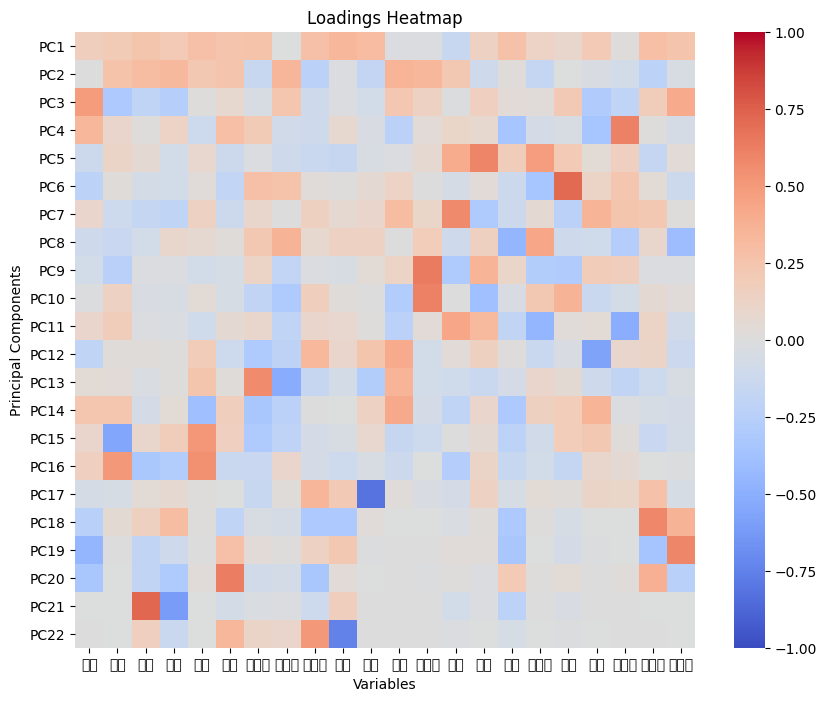

In [12]:
import seaborn as sns

# ヒートマップの作成
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Loadings Heatmap')
plt.xlabel('Variables')
plt.ylabel('Principal Components')
plt.show()


第1主成分および第2主成分の負荷量を分析すると、以下の傾向が認められる。

第1主成分においては、「塁打」「本塁打」「打点」「長打率」など、打撃力を示す指標の負荷量が高い。これは第1主成分が打撃力や得点能力を反映することを示唆している。また、「試合」「打席」「打数」など出場機会に関連する指標も高い負荷量を示しており、出場機会が多い選手ほど高い成績を達成しやすいことが示唆されている。

第2主成分に関しては、「三塁打」「盗塁」「盗塁刺」など、速さや俊敏性を示す指標の負荷量が高い。これは第2主成分が選手のスピードや敏捷性を反映することを示している。一方で、「打数」の負荷量は高いが、「本塁打」「長打率」などパワーを示す指標は負の値を示しており、第2主成分がスピード型選手とパワー型選手の差異を捉えていることを示唆している。

これらの結果から、第1主成分は主に打撃力と出場機会を、第2主成分は選手のスピードとパワーの違いを表していると解釈される。